In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from shapely.geometry import LineString, MultiLineString
import osmnx as ox

In [3]:

roads = gpd.read_file("Roads/Roads.shp")  # or "roads.geojson"
# print(roads.head())


<Axes: >

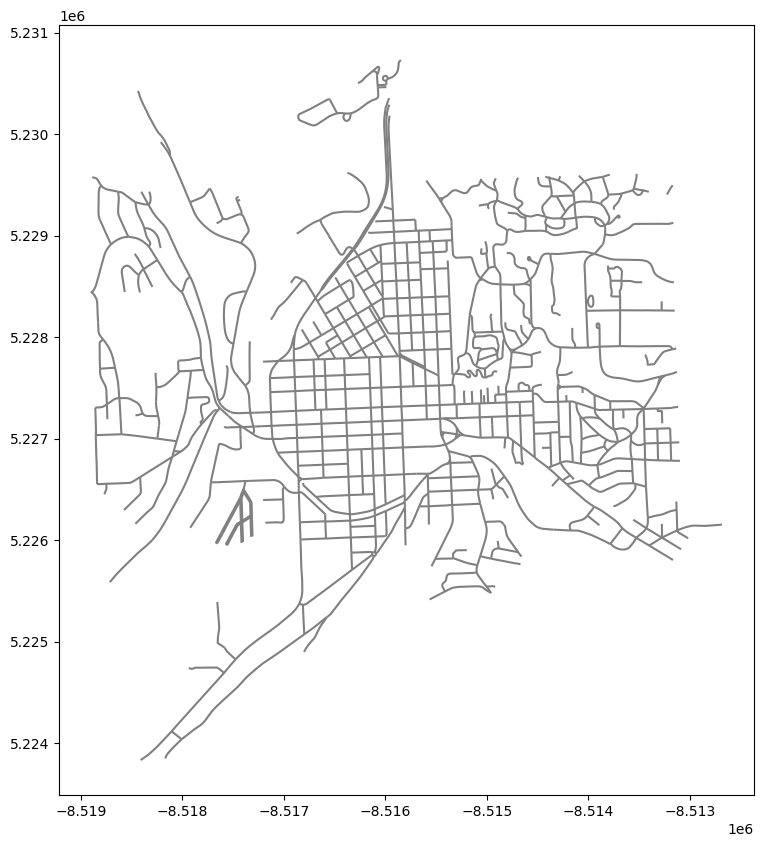

In [4]:
roads.plot(figsize=(10, 10), color="gray")

In [7]:

G = nx.Graph()

for _, row in roads.iterrows():
    geom = row.geometry

    # Handle MultiLineString vs LineString
    if isinstance(geom, LineString):
        lines = [geom]
    elif isinstance(geom, MultiLineString):
        lines = list(geom.geoms)
    else:
        continue  # skip if geometry isn't a line

    # Add edges for each LineString
    for line in lines:
        coords = list(line.coords)
        for i in range(len(coords) - 1):
            p1, p2 = coords[i], coords[i + 1]
            G.add_edge(p1, p2, length=line.length)


KeyboardInterrupt: 

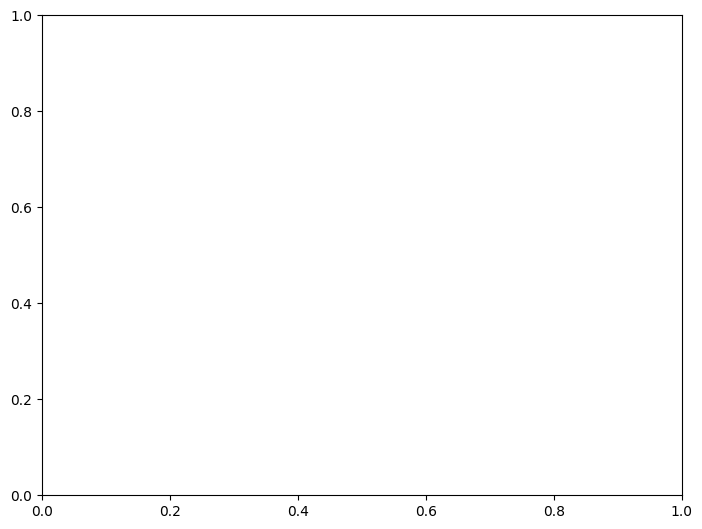

In [8]:
nx.draw(G, with_labels=False, node_color='skyblue', node_size=1)
plt.title("My NetworkX Graph")
plt.axis('off') # Turn off the axis
plt.show()

In [9]:
print(G.nodes())

[(-8518294.60540494, 5228494.96206872), (-8518376.62213005, 5228657.17688506), (-8518382.71525366, 5228673.16270518), (-8518211.33678226, 5228879.5797441), (-8518215.91989799, 5228887.65620943), (-8518218.67136437, 5228897.12857951), (-8518230.2581123, 5228951.941186), (-8518232.36565512, 5228960.7403778), (-8518236.01757414, 5228972.90452671), (-8518240.23769005, 5228983.69777975), (-8518244.12459421, 5228991.77380339), (-8518252.33840207, 5229005.88209425), (-8518258.46785943, 5229014.60660992), (-8518269.82751726, 5229027.99272797), (-8518274.97929726, 5229034.02547017), (-8518278.84352923, 5229038.01329586), (-8518291.77782204, 5229048.65762796), (-8518302.80679848, 5229055.93685625), (-8518314.53245676, 5229062.51787713), (-8518326.87836244, 5229067.05509536), (-8518339.63714858, 5229070.89402555), (-8518347.39644129, 5229072.11591602), (-8518353.55777666, 5229072.68967517), (-8518359.71948258, 5229072.56485482), (-8518365.80389419, 5229072.46564613), (-8518374.54289166, 5229073.6

C:\Users\logan\AppData\Local\Temp\ipykernel_29140\609483048.py:8: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(x, y)


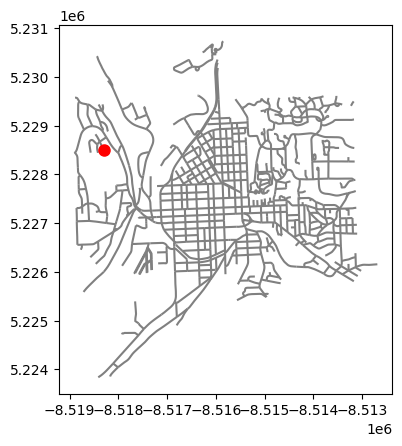

KeyboardInterrupt: 

In [10]:
import time
plt.ion()
fig, ax = plt.subplots()
roads.plot(ax=ax, color="gray")
car, = ax.plot([], [], 'ro', markersize=8)

for x, y in G.nodes():
    car.set_data(x, y)
    plt.pause(0.01)  # pause to simulate motion
plt.show()


In [12]:
G = ox.graph_from_place("Ithaca, New York, USA", network_type="drive")
# G = ox.simplify_graph(G)

In [14]:
sp = nx.shortest_path(G,(-8518294.60540494, 5228494.96206872),(-8518326.12187435, 5229433.92773774))

NodeNotFound: Either source (-8518294.60540494, 5228494.96206872) or target (-8518326.12187435, 5229433.92773774) is not in G

KeyError: 0

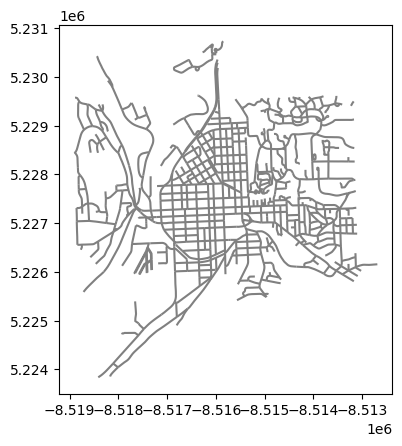

In [13]:
from matplotlib.animation import FuncAnimation
# import osmnx as ox

# G = ox.simplify_graph(G)
fig, ax = plt.subplots()
roads.plot(ax=ax, color="gray")
car, = ax.plot([], [], 'ro', markersize=3)
route = G.nodes()
def update(frame):
    x, y = route[frame]
    car.set_data(x, y)
    return car,

anim = FuncAnimation(fig, update, frames=len(route), interval=50, blit=True)
plt.show()


C:\Users\logan\AppData\Local\Temp\ipykernel_29900\3533154232.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])


Graph built: 7344 nodes, 7575 edges
Finding shortest path...
Path length: 226 nodes


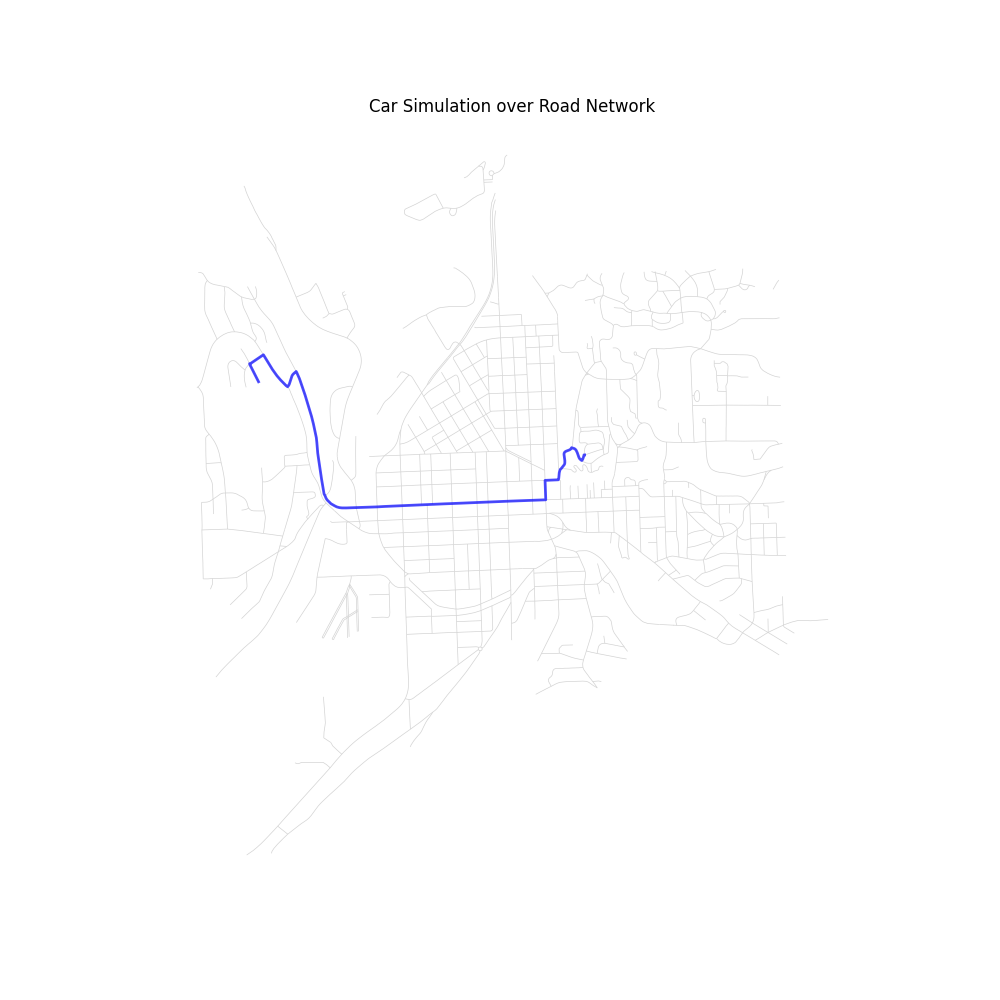

In [4]:
import geopandas as gpd
import networkx as nx
%matplotlib widget
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Point
from matplotlib.animation import FuncAnimation
import osmnx as ox

# =======================
# 1. Load the road data
# =======================
roads = gpd.read_file("Roads/Roads.shp")  # or "roads.geojson"
roads = roads.to_crs(epsg=4326)     # ensure lat/lon coordinates

# =======================
# 2. Build a NetworkX graph
# =======================
G = nx.Graph()

for _, row in roads.iterrows():
    geom = row.geometry
    if isinstance(geom, LineString):
        lines = [geom]
    elif isinstance(geom, MultiLineString):
        lines = list(geom.geoms)
    else:
        continue
    
    for line in lines:
        coords = list(line.coords)
        for i in range(len(coords) - 1):
            p1, p2 = coords[i], coords[i+1]
            dist = Point(p1).distance(Point(p2))
            G.add_edge(p1, p2, length=dist)

# G = ox.graph_from_place("Ithaca, New York, USA", network_type="drive")

print(f"Graph built: {len(G.nodes)} nodes, {len(G.edges)} edges")

# =======================
# 3. Pick start & end nodes
# =======================
# Pick arbitrary nodes for demo – replace with your own
nodes = list(G.nodes)
start = nodes[0]
end = nodes[len(nodes)//2]
end = nodes[-1]

# Compute shortest path by road length
print("Finding shortest path...")
route = nx.shortest_path(G, source=start, target=end, weight="length")
print(f"Path length: {len(route)} nodes")

# =======================
# 4. Plot the map background
# =======================
fig, ax = plt.subplots(figsize=(10, 10))
roads.plot(ax=ax, color="lightgray", linewidth=0.5)
ax.set_title("Car Simulation over Road Network")
ax.set_axis_off()

# Extract route coordinates
xs, ys = zip(*route)
ax.plot(xs, ys, color="blue", linewidth=2, alpha=0.7)  # route line

# =======================
# 5. Animate the car
# =======================
car, = ax.plot([], [], 'ro', markersize=8)

def update(frame):
    car.set_data(xs[frame], ys[frame])
    return car,

anim = FuncAnimation(fig, update, frames=len(xs), interval=50, blit=True)

plt.show()


In [5]:
import math

def turn_angle(p1, p2, p3):
    """Compute turning angle in radians at vertex p2 formed by p1->p2->p3"""
    v1 = (p1[0] - p2[0], p1[1] - p2[1])
    v2 = (p3[0] - p2[0], p3[1] - p2[1])
    dot = v1[0]*v2[0] + v1[1]*v2[1]
    mag1 = math.hypot(*v1)
    mag2 = math.hypot(*v2)
    cosang = max(-1, min(1, dot / (mag1 * mag2)))
    return math.acos(cosang)


C:\Users\logan\AppData\Local\Temp\ipykernel_29900\3533154232.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])
C:\Users\logan\AppData\Local\Temp\ipykernel_29900\1922574117.py:72: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])


In [10]:
from networkx.algorithms.euler import eulerian_circuit

cpp_route = list(eulerian_circuit(G))
print(f"CPP route covers {len(cpp_route)} edges")


C:\Users\logan\AppData\Local\Temp\ipykernel_29900\3533154232.py:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])
C:\Users\logan\AppData\Local\Temp\ipykernel_29900\1922574117.py:72: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  car.set_data(xs[frame], ys[frame])


NetworkXError: G is not Eulerian.